<center><h1><b>EXPLORATORY DATA ANALYSIS</b></h1></center>

In [10]:
# importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [11]:
data = pd.read_csv(r"data\FastagFraudDetection.csv")

In [52]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Transaction_paid_diff,date_time_hrs,date_month,time_category
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,230,11,1,Morning
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,20,14,1,Afternoon
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,0,18,1,Evening
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,230,2,1,Night
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,40,6,1,Morning


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [14]:
data.isna().any()

Transaction_ID           False
Timestamp                False
Vehicle_Type             False
FastagID                  True
TollBoothID              False
Lane_Type                False
Vehicle_Dimensions       False
Transaction_Amount       False
Amount_paid              False
Geographical_Location    False
Vehicle_Speed            False
Vehicle_Plate_Number     False
Fraud_indicator          False
dtype: bool

In [15]:
print(f"{np.round(data['FastagID'].isna().mean() * 100, 2)} %  of data missing in FastagID") 

10.98 %  of data missing in FastagID


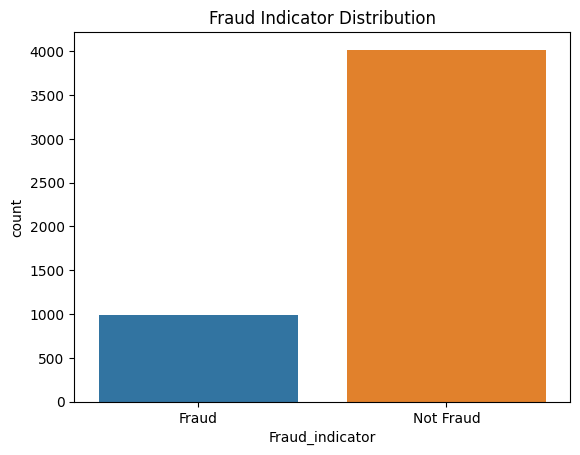

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


In [17]:
sns.countplot(data = data, x = 'Fraud_indicator', hue = 'Fraud_indicator')
plt.title('Fraud Indicator Distribution')
plt.show()
print(data["Fraud_indicator"].value_counts())

In [18]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
numerical_features

['Transaction_ID', 'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

In [19]:
data[numerical_features].nunique()

Transaction_ID        5000
Transaction_Amount      20
Amount_paid             23
Vehicle_Speed           85
dtype: int64

Dropping Transaction_ID from numerical features, Since it represents Unique identifier of transaction made in Fastag. Since, Transaction_Amount and Amount_paid has less than 25 unique values, we consider only Vehicle_Speed as a continuous numerical feature 

In [20]:
numerical_features.remove('Transaction_ID')

In [21]:
data[numerical_features].head()

,Transaction_Amount,Amount_paid,Vehicle_Speed
0,350,120,65
1,120,100,78
2,0,0,53
3,350,120,92
4,140,100,60


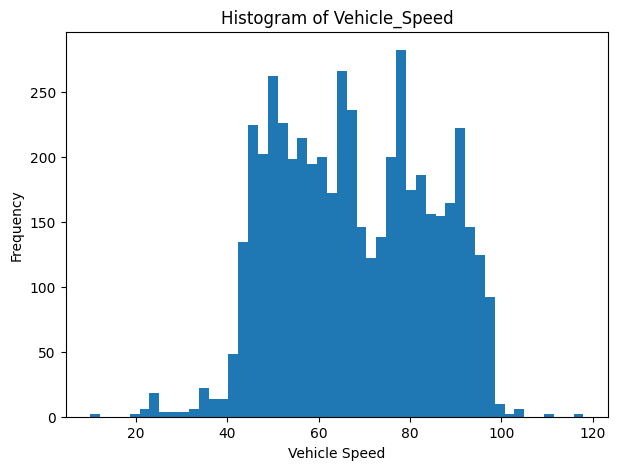

In [25]:
plt.figure(figsize = (7, 5))
data['Vehicle_Speed'].hist(bins=50)
plt.title(f'Histogram of Vehicle_Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

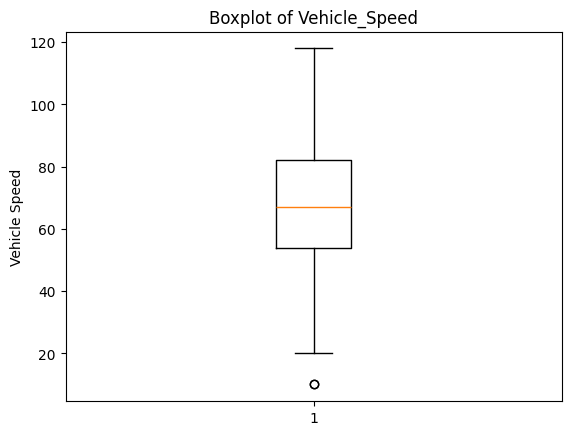

In [26]:
plt.boxplot(data['Vehicle_Speed'])
plt.title(f'Boxplot of Vehicle_Speed')
plt.ylabel('Vehicle Speed')
plt.show()

Vechicle speed is approximately normal

In [27]:
# trying to relate a new feature with fraud indicator
data["Transaction_paid_diff"]  = data["Transaction_Amount"] - data["Amount_paid"]

In [28]:
data["Transaction_paid_diff"].nunique()

45

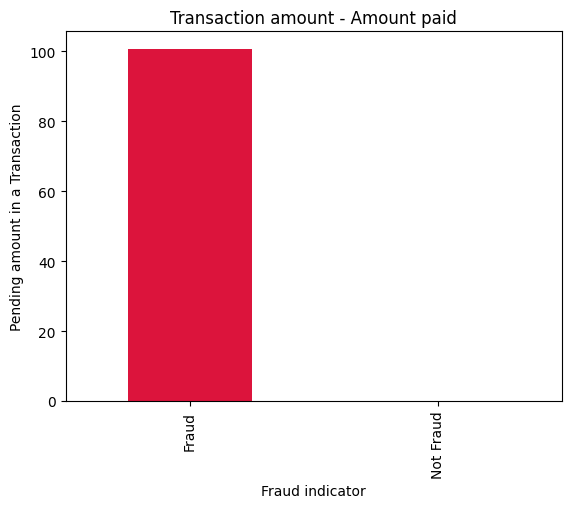

In [29]:
data.groupby('Fraud_indicator')['Transaction_paid_diff'].mean().plot.bar(color=['crimson','lightgreen'])
plt.title("Transaction amount - Amount paid")
plt.xlabel("Fraud indicator")
plt.ylabel("Pending amount in a Transaction")
plt.show()

Not Frauad has zero difference between Transaction_Amount and Amount_paid

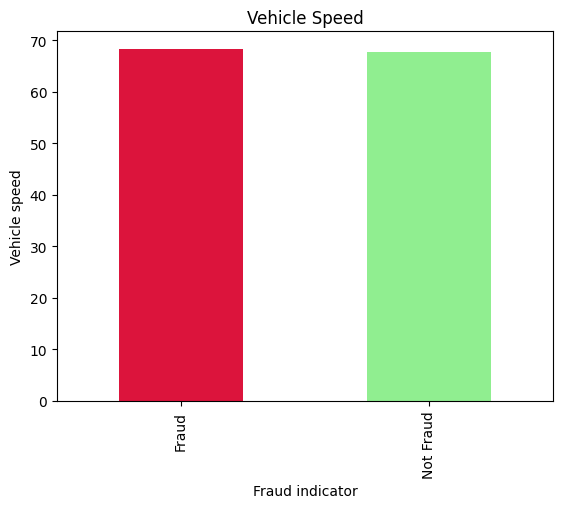

In [30]:
data.groupby('Fraud_indicator')['Vehicle_Speed'].mean().plot.bar(color=['crimson','lightgreen'])
plt.title("Vehicle Speed")
plt.xlabel("Fraud indicator")
plt.ylabel("Vehicle speed")
plt.show()

Vehicle speed nearly same for both fraud indicators

In [31]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O' and not feature.startswith('Time')]
categorical_features 

['Vehicle_Type',
 'FastagID',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'Vehicle_Plate_Number',
 'Fraud_indicator']

In [32]:
datetime_features = [feature for feature in data.columns if data[feature].dtypes == 'O' and feature.startswith('Time')]
datetime_features

['Timestamp']

In [33]:
data[categorical_features].nunique()

Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Geographical_Location       5
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

Removing unique identifiers FastagID, Vehicle_Plate_Number and also the target variable

In [34]:
categorical_features.remove('FastagID')
categorical_features.remove('Fraud_indicator')
categorical_features.remove('Vehicle_Plate_Number')
categorical_features        

['Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location']

In [35]:
data[categorical_features].head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location
0,Bus,A-101,Express,Large,"13.059816123454882, 77.77068662374292"
1,Car,B-102,Regular,Small,"13.059816123454882, 77.77068662374292"
2,Motorcycle,D-104,Regular,Small,"13.059816123454882, 77.77068662374292"
3,Truck,C-103,Regular,Large,"13.059816123454882, 77.77068662374292"
4,Van,B-102,Express,Medium,"13.059816123454882, 77.77068662374292"


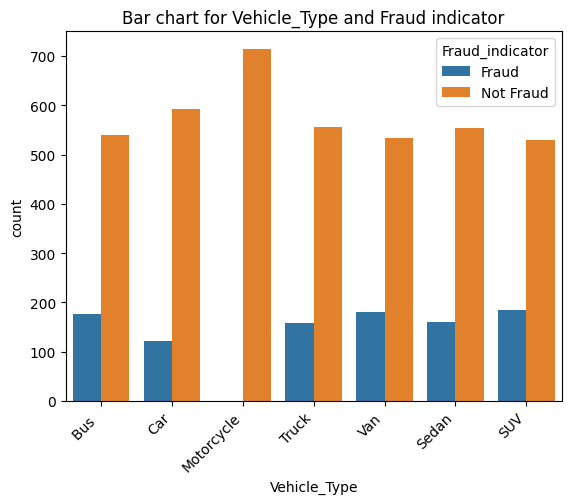

Fraud_indicator     Fraud  Not Fraud
Vehicle_Type                        
Bus              0.247207   0.752793
Car              0.170868   0.829132
Motorcycle       0.000000   1.000000
SUV              0.257703   0.742297
Sedan            0.225490   0.774510
Truck            0.221289   0.778711
Van              0.253501   0.746499


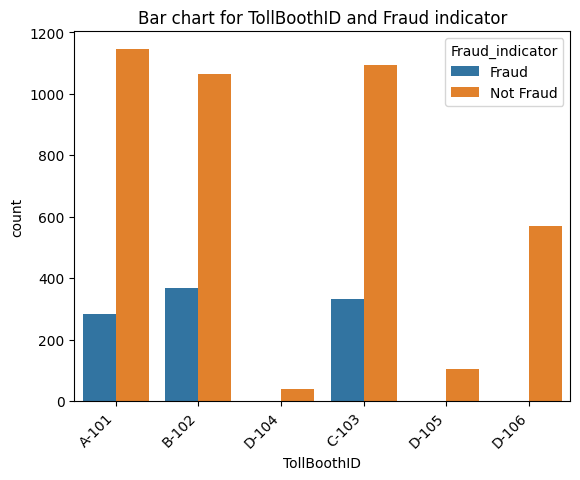

Fraud_indicator     Fraud  Not Fraud
TollBoothID                         
A-101            0.198179   0.801821
B-102            0.256285   0.743715
C-103            0.233520   0.766480
D-104            0.000000   1.000000
D-105            0.000000   1.000000
D-106            0.000000   1.000000


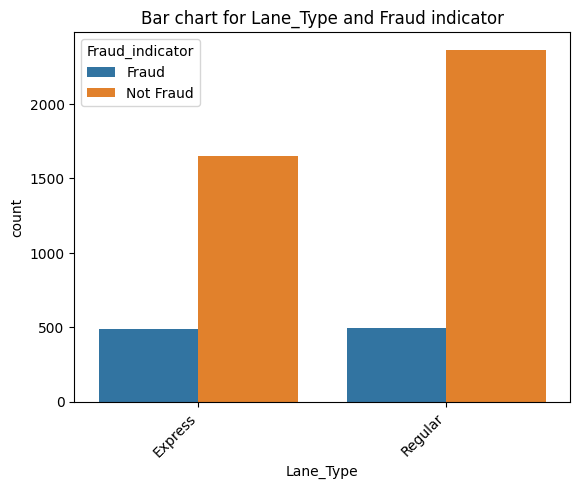

Fraud_indicator     Fraud  Not Fraud
Lane_Type                           
Express          0.228758   0.771242
Regular          0.172498   0.827502


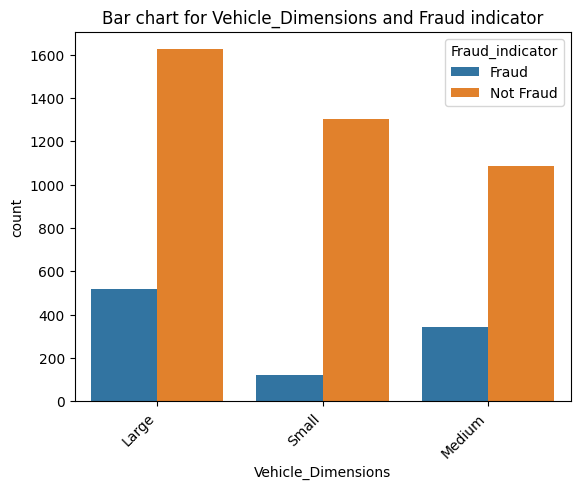

Fraud_indicator        Fraud  Not Fraud
Vehicle_Dimensions                     
Large               0.242071   0.757929
Medium              0.239496   0.760504
Small               0.085434   0.914566


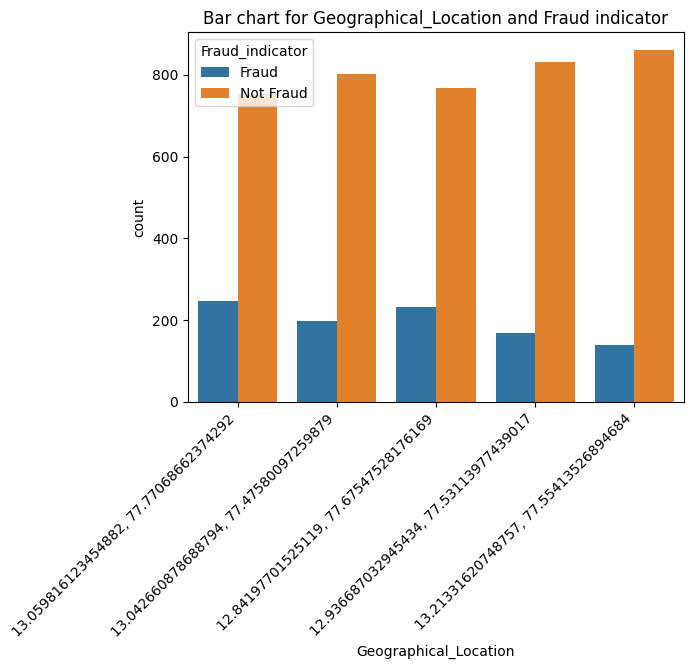

Fraud_indicator                        Fraud  Not Fraud
Geographical_Location                                  
12.84197701525119, 77.67547528176169   0.231      0.769
12.936687032945434, 77.53113977439017  0.168      0.832
13.042660878688794, 77.47580097259879  0.199      0.801
13.059816123454882, 77.77068662374292  0.246      0.754
13.21331620748757, 77.55413526894684   0.139      0.861


In [36]:
for feature in categorical_features:
    sns.countplot(data = data, x = feature, hue ='Fraud_indicator')
    plt.title(f'Bar chart for {feature} and Fraud indicator')
    plt.xticks(rotation = 45, ha = 'right')
    plt.xlabel(feature)
    plt.show()

    crosstab = pd.crosstab(data[feature], data['Fraud_indicator'], normalize='index')

    print(crosstab)

Only vehicle dimension has some visible relationship with fraud categories, others not having concludable relationship with the fraud categories

In [37]:
data[datetime_features].head()

,Timestamp
0,1/6/2023 11:20
1,1/7/2023 14:55
2,1/8/2023 18:25
3,1/9/2023 2:05
4,1/10/2023 6:35


In [38]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

In [39]:
data[datetime_features].head()

,Timestamp
0,2023-01-06 11:20:00
1,2023-01-07 14:55:00
2,2023-01-08 18:25:00
3,2023-01-09 02:05:00
4,2023-01-10 06:35:00


Exploring date time features with the fraud categories

In [41]:
# extracting hours
data["date_time_hrs"] = data['Timestamp'].dt.floor('h').dt.hour

In [42]:
# extracting months
data["date_month"] = data["Timestamp"].dt.to_period('M').dt.month

In [43]:
datetime_features.extend(["date_month", "date_time_hrs"])

In [44]:
data[datetime_features].head()

,Timestamp,date_month,date_time_hrs
0,2023-01-06 11:20:00,1,11
1,2023-01-07 14:55:00,1,14
2,2023-01-08 18:25:00,1,18
3,2023-01-09 02:05:00,1,2
4,2023-01-10 06:35:00,1,6


In [45]:
data[datetime_features].nunique()

Timestamp        4423
date_month         12
date_time_hrs      24
dtype: int64

In [46]:
datetime_features.remove('Timestamp')

In [47]:
# further classifying into time categories
def classify_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [48]:
data["time_category"] = data["date_time_hrs"].apply(classify_time)

In [49]:
datetime_features.append("time_category")

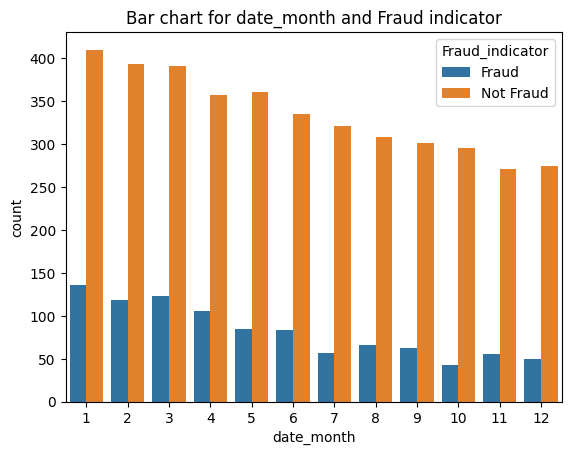

Fraud_indicator     Fraud  Not Fraud
date_month                          
1                0.249084   0.750916
2                0.230920   0.769080
3                0.239300   0.760700
4                0.227273   0.772727
5                0.188764   0.811236
6                0.198565   0.801435
7                0.150794   0.849206
8                0.176471   0.823529
9                0.170799   0.829201
10               0.127219   0.872781
11               0.171254   0.828746
12               0.154321   0.845679


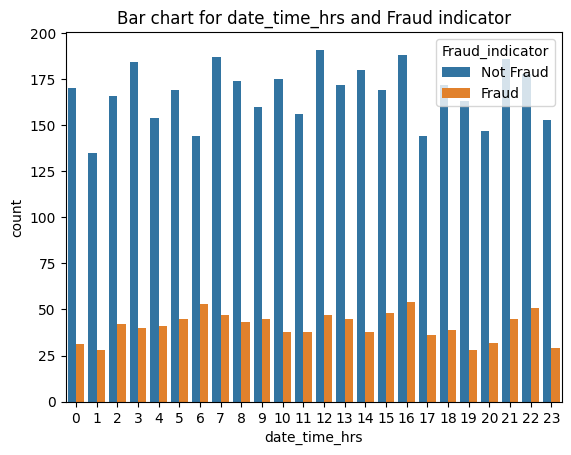

Fraud_indicator     Fraud  Not Fraud
date_time_hrs                       
0                0.154229   0.845771
1                0.171779   0.828221
2                0.201923   0.798077
3                0.178571   0.821429
4                0.210256   0.789744
5                0.210280   0.789720
6                0.269036   0.730964
7                0.200855   0.799145
8                0.198157   0.801843
9                0.219512   0.780488
10               0.178404   0.821596
11               0.195876   0.804124
12               0.197479   0.802521
13               0.207373   0.792627
14               0.174312   0.825688
15               0.221198   0.778802
16               0.223140   0.776860
17               0.200000   0.800000
18               0.184834   0.815166
19               0.146597   0.853403
20               0.178771   0.821229
21               0.194805   0.805195
22               0.222707   0.777293
23               0.159341   0.840659


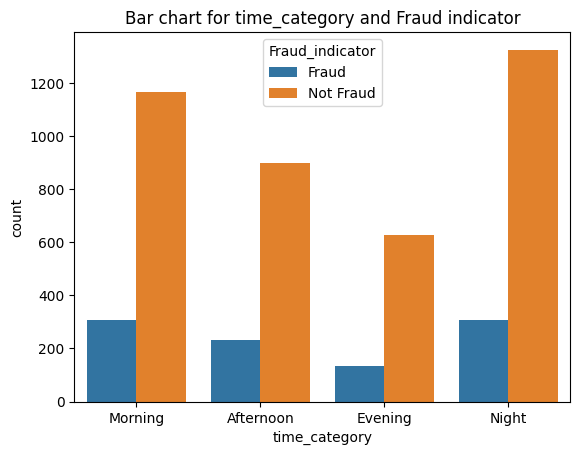

Fraud_indicator     Fraud  Not Fraud
time_category                       
Afternoon        0.204947   0.795053
Evening          0.177398   0.822602
Morning          0.209634   0.790366
Night            0.187998   0.812002


In [51]:
for feature in datetime_features:
    sns.countplot(data = data, x = feature, hue ='Fraud_indicator')
    plt.title(f'Bar chart for {feature} and Fraud indicator')
    plt.xlabel(feature)
    plt.show()

    crosstab = pd.crosstab(data[feature], data['Fraud_indicator'], normalize = 'index')
    print(crosstab)

Clearly date time extracted features is not having concludable relationship with fraud categories